In [1]:
import pandas as pd

In [2]:
players=pd.read_csv("Quotazioni_Fantacalcio_Ruoli_Mantra.csv")

In [3]:
players["Name"]=players["Name"].str.replace(" ","")
players["Name"]=players["Name"].str.replace("-","")
players["Name"]=players["Name"].str.replace("'","")

In [4]:
playersStats=pd.read_csv("Statistiche_Fantacalcio_2018-19.csv")
playersStats["Name"]=playersStats["Nome"].str.replace(" ","")
playersStats["Name"]=playersStats["Nome"].str.replace("-","")
playersStats["Name"]=playersStats["Nome"].str.replace("'","")

In [5]:
pls=pd.merge(playersStats, players, left_on='Name', right_on='Name',how="right")
print(pls.columns.values)
print(pls.count())
print(pls[pls["Name"]=="LUKAKU R"])

['Id_x' 'R_x' 'Nome' 'Squadra_x' 'Pg' 'Mv' 'Mf' 'WeightedPerf' 'Name'
 'Id_y' 'R_y' 'Squadra_y' 'Qt. Amantra' 'Qt. Imantra' 'Diff.']
Id_x            337
R_x             337
Nome            337
Squadra_x       337
Pg              337
Mv              337
Mf              337
WeightedPerf    337
Name            563
Id_y            563
R_y             563
Squadra_y       563
Qt. Amantra     563
Qt. Imantra     563
Diff.           563
dtype: int64
Empty DataFrame
Columns: [Id_x, R_x, Nome, Squadra_x, Pg, Mv, Mf, WeightedPerf, Name, Id_y, R_y, Squadra_y, Qt. Amantra, Qt. Imantra, Diff.]
Index: []


0.5206372522657288


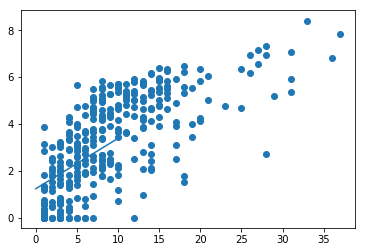

'Probably best model for outliers (interesting players)'

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
X = pls[["Qt. Amantra","WeightedPerf"]]
X=X.dropna()
y = X["WeightedPerf"]
X=X.drop("WeightedPerf",axis=1)

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))

x = np.linspace(0,10,1000)
y2 = reg.intercept_+reg.coef_[0]*x

plt.scatter(X["Qt. Amantra"],y)
plt.plot(x,y2)
plt.show()
'''Probably best model for outliers (interesting players)'''

In [7]:
pls_with_no_mean=pls[pls['WeightedPerf'].isnull()]
print(pls_with_no_mean.count())
print("\n\n")
print(pls.count())

Id_x              0
R_x               0
Nome              0
Squadra_x         0
Pg                0
Mv                0
Mf                0
WeightedPerf      0
Name            226
Id_y            226
R_y             226
Squadra_y       226
Qt. Amantra     226
Qt. Imantra     226
Diff.           226
dtype: int64



Id_x            337
R_x             337
Nome            337
Squadra_x       337
Pg              337
Mv              337
Mf              337
WeightedPerf    337
Name            563
Id_y            563
R_y             563
Squadra_y       563
Qt. Amantra     563
Qt. Imantra     563
Diff.           563
dtype: int64


In [8]:

attrs=pls_with_no_mean[["WeightedPerf","Qt. Amantra"]]
attrs=attrs.drop("WeightedPerf",axis=1)
pls_with_no_mean["WeightedPerf"]=reg.predict(attrs)
#print(pls_with_no_mean[["MeanFantasyEvaluation","Name"]])
print(pls_with_no_mean.count())
print(pls_with_no_mean)

Id_x              0
R_x               0
Nome              0
Squadra_x         0
Pg                0
Mv                0
Mf                0
WeightedPerf    226
Name            226
Id_y            226
R_y             226
Squadra_y       226
Qt. Amantra     226
Qt. Imantra     226
Diff.           226
dtype: int64
     Id_x  R_x Nome Squadra_x  Pg  Mv  Mf  WeightedPerf               Name  \
337   NaN  NaN  NaN       NaN NaN NaN NaN     10.914231   CRISTIANORONALDO   
338   NaN  NaN  NaN       NaN NaN NaN NaN      8.977947            LUKAKUR   
339   NaN  NaN  NaN       NaN NaN NaN NaN      8.762804            ZAPATAD   
340   NaN  NaN  NaN       NaN NaN NaN NaN      7.041663             GOMEZA   
341   NaN  NaN  NaN       NaN NaN NaN NaN      6.611377          MARTINEZL   
342   NaN  NaN  NaN       NaN NaN NaN NaN      6.396234           SANCHEZA   
343   NaN  NaN  NaN       NaN NaN NaN NaN      6.181092    MILINKOVICSAVIC   
344   NaN  NaN  NaN       NaN NaN NaN NaN      5.965949        

/home/asino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
pls_with_mean=pls[pls['WeightedPerf'].notnull()]
playerz=pd.concat([pls_with_mean,pls_with_no_mean],ignore_index=True)
print(playerz.count())
playerz.to_csv("players_with_interpolated_mean.csv")

Id_x            337
R_x             337
Nome            337
Squadra_x       337
Pg              337
Mv              337
Mf              337
WeightedPerf    563
Name            563
Id_y            563
R_y             563
Squadra_y       563
Qt. Amantra     563
Qt. Imantra     563
Diff.           563
dtype: int64


In [10]:
from scipy.stats import binom
def probToPlay(playersInField,indexOfPlayer,probabilityOfFault):
    minNumberOfFaults=indexOfPlayer-playersInField
    probOfLessThanOrEqualNFaults=binom.cdf(minNumberOfFaults-1, playersInField, probabilityOfFault)
    return 1-probOfLessThanOrEqualNFaults
print(probToPlay(4,5,0.1))

0.3439


In [11]:
def getPlayerRoleCompatibilityString():
    mantraRoles=pd.read_csv("Quotazioni_Fantacalcio_Ruoli_Mantra.csv")
    mantraRoles["Name"]=mantraRoles["Name"].str.replace(" ","")
    mantraRoles["Name"]=mantraRoles["Name"].str.replace("-","")
    mantraRoles["Name"]=mantraRoles["Name"].str.replace("'","")
    
    mantraRoles=pd.merge(mantraRoles, pls[["Name"]], left_on='Name', right_on='Name',how="inner")
    
    
    roleCompatibilityString = "set CompatibilityPlayerRole:= \n"
    for  index, player in mantraRoles.iterrows():
        roleCompatibilityString+= "({},*)".format(player["Name"])
        for role in player["R"].split(";"):
            roleCompatibilityString+=" {}".format(role)
        roleCompatibilityString+="\n"
    roleCompatibilityString+=";"
    return roleCompatibilityString

print(getPlayerRoleCompatibilityString())

set CompatibilityPlayerRole:= 
(CRISTIANORONALDO,*) Pc
(PIATEK,*) Pc
(IMMOBILE,*) Pc
(LUKAKUR,*) Pc
(ZAPATAD,*) Pc
(QUAGLIARELLA,*) Pc
(ICARDI,*) Pc
(DZEKO,*) Pc
(BELOTTI,*) Pc
(INSIGNE,*) A
(HIGUAIN,*) Pc
(MERTENS,*) Pc
(MILIK,*) Pc
(CHIESA,*) W A
(GOMEZA,*) T A
(CAPUTO,*) Pc
(PETAGNA,*) Pc
(ILICIC,*) A
(PAVOLETTI,*) Pc
(MARTINEZL,*) Pc
(DYBALA,*) A
(SANCHEZA,*) A
(INGLESE,*) Pc
(MILINKOVICSAVIC,*) C T
(DEPAUL,*) T A
(RAFAELLEAO,*) Pc
(IAGOFALQUE,*) A
(LOZANO,*) A
(MANDZUKIC,*) Pc
(CORREA,*) A
(BERNARDESCHI,*) W A
(SUSO,*) W A
(CALLEJON,*) W
(LUISALBERTO,*) T
(PINAMONTI,*) Pc
(UNDER,*) W A
(RIBERY,*) W A
(MURIEL,*) Pc
(BALOTELLI,*) Pc
(GERVINHO,*) A
(HANDANOVIC,*) Por
(DESTRO,*) Pc
(BARELLA,*) M C
(BONAVENTURA,*) C W T
(KOUAME,*) A
(BERARDI,*) A
(ORSOLINI,*) W A
(VERDI,*) W A
(KLUIVERT,*) W
(RAMSEY,*) T
(SZCZESNY,*) Por
(DONNARUMMAAL,*) Pc
(LAZZARIM,*) E
(RUIZ,*) C T
(BOATENG,*) A
(ZANIOLO,*) T
(LASAGNA,*) Pc
(KOLAROV,*) Ds E
(CRISCITO,*) Ds Dc E
(IZZO,*) Dd Dc
(NAINGGOLAN,*) C T
(ZIE

In [12]:
def initializeModules():
    modules={}
    m343=[]
    for i in range(3):
        m343.append(["Dc"])
    for i in range(2):
        m343.append(["E"])
    for i in range(2):
        m343.append(["W","A"])
    m343.append(["C"])
    m343.append(["M","C"])
    m343.append(["A","Pc"])
    modules["m343"]=m343
    
    
    m3412=[]
    for i in range(3):
        m3412.append(["Dc"])
    for i in range(2):
        m3412.append(["E"])
    for i in range(2):
        m3412.append(["Pc","A"])   
    m3412.append(["C"])
    m3412.append(["M","C"])
    m3412.append(["T"])
    modules["m3412"]=m3412  
    
    
    m3421=[]
    for i in range(3):
        m3421.append(["Dc"])  
    m3421.append(["M"])
    m3421.append(["M","C"])
    m3421.append(["E"])
    m3421.append(["T"])
    m3421.append(["E","W"])
    m3421.append(["Pc","A"])
    m3421.append(["T","A"])
    modules["m3421"]=m3421  
    
    m352=[]
    for i in range(3):
        m352.append(["Dc"])
    for i in range(2):
        m352.append(["A","Pc"])
    m352.append(["E","W"])
    m352.append(["M"])
    m352.append(["M","C"])
    m352.append(["E"])
    m352.append(["C"])
    modules["m352"]=m352  
    
    m3511=[]
    for i in range(3):
        m3511.append(["Dc"])
    for i in range(2):
        m3511.append(["M"])
    for i in range(2):
        m3511.append(["E","W"])
    m3511.append(["C"])
    m3511.append(["A","Pc"])
    m3511.append(["T","A"])
    modules["m3511"]=m3511  
    
    
    m433=[]
    for i in range(2):
        m433.append(["Dc"])
    for i in range(2):
        m433.append(["W","A"])
    m433.append(["Dd"])
    m433.append(["Ds"])
    m433.append(["C"])
    m433.append(["M"])
    m433.append(["C","M"])
    m433.append(["A","Pc"])
    modules["m433"]=m433
    
    m4312=[]
    for i in range(2):
        m4312.append(["Dc"])
    m4312.append(["Dd"])
    m4312.append(["Ds"])
    for i in range(2):
        m4312.append(["A","Pc"])
    m4312.append(["C"])
    m4312.append(["M"])
    m4312.append(["C","M"])
    m4312.append(["T"])
    modules["m4312"]=m4312
    
    m442=[]
    for i in range(2):
        m442.append(["Dc"])
    m442.append(["Dd"])
    m442.append(["Ds"])
    for i in range(2):
        m442.append(["A","Pc"])
    m442.append(["C"])
    m442.append(["E"])
    m442.append(["C","M"])
    m442.append(["E","W"])
    modules["m442"]=m442
    
    m4141=[]
    for i in range(2):
        m4141.append(["Dc"])
    m4141.append(["Dd"])
    m4141.append(["Ds"])
    for i in range(2):
        m4141.append(["C","T"])
    for i in range(2):
        m4141.append(["W"])
    m4141.append(["M"])
    m4141.append(["A","Pc"])
    modules["m4141"]=m4141
    
    m4411=[]
    for i in range(2):
        m4411.append(["Dc"])
    m4411.append(["Dd"])
    m4411.append(["Ds"])
    for i in range(2):
        m4411.append(["E","W"])
    m4411.append(["C"])
    m4411.append(["A","T"])
    m4411.append(["M"])
    m4411.append(["A","Pc"])
    modules["m4411"]=m4411
    
    m4231=[]
    for i in range(2):
        m4231.append(["Dc"])
    m4231.append(["Dd"])
    m4231.append(["Ds"])
    
    m4231.append(["M"])
    m4231.append(["M","C"])
    m4231.append(["W"])
    m4231.append(["T"])
    m4231.append(["A","Pc"])
    m4231.append(["W","A"])
    modules["m4231"]=m4231
    
    
    for key,mod in modules.items():
        mod.append(["Por"])
        mod+=mod
        
    uselessModules=["m3412","m3421","m352","m4312"]
    for uselessModule in uselessModules:
        del modules[uselessModule]
    
    return modules


def produceStringFromDictOfModules(dictOfModules):
    retString="set CompatibilitySlotRole:=\n"
    modString="set Modules:= "
    multiplierString="param :multiplier:=\n"
    
    for key,val in dictOfModules.items():
        numberOfSlot=1
        modString+=" {}".format(key)
        for slot in val:
            retString+="({},{},*) =".format(key,numberOfSlot)
            for role in slot:
                retString+=" {} ".format(role)
            retString+="\n"
            numberOfSlot+=1
        for i in range(11):
            multiplierString+="{} {} {}\n".format(key,i+12,probToPlay(4,5,0.1))
    retString+=";\n"
    retString+=modString
    retString+=";\n"
    retString+=multiplierString
    retString+=";\n"
    
    return retString;



In [13]:
def initializeMilp(playersDF):
    performanceString = "param:performance := \n"
    costString = "param :cost:= \n"
    playersString = "set Players:= "
    boughtParameterString= "param:alreadyBought:="
    roleSlotString="set CompatibilitySlotRole:= \n"
    
    
    probabilityOfFault=0.1
    
    cont=0
    slotPos=1
    
    for  index, player in playersDF.iterrows():
        if not player["bought"]:
            cont+=1
            performanceString+= "{} {}\n".format(player["name"],player["perf"])
            costString+= "{} {}\n".format(player["name"],player["cost"])
            boughtParameterString+= "{} {}\n".format(player["name"],player["bought"])
            playersString+= " {} ".format(player["name"])

    print("{} players available".format(cont))



    roleCompatibilityString=getPlayerRoleCompatibilityString()
    performanceString+= ";\n"
    costString+= ";\n"
    playersString+= ";\n"
    boughtParameterString+= ";\n"
    roleSlotString=produceStringFromDictOfModules(initializeModules())
    
    with open('dat-file-configuration-mantra.txt', 'r') as file:
        fixedHeader  =  file.read()
        with open('fantasy-auction-mantra.dat', 'w') as outputFile:
            #outputFile.write("param  budget:={};\n".format(BUDGET))
            outputFile.write(fixedHeader)
            outputFile.write(roleSlotString)
            #outputFile.write(multiplierString)
            outputFile.write(playersString)
            outputFile.write(roleCompatibilityString)
            outputFile.write(performanceString)
            #outputFile.write(costString)
            outputFile.write(boughtParameterString)
            

In [16]:
playerz["bought"]=0
playerz["name"]=playerz["Name"]
#playerz["role"]=playerz["R"]
playerz["perf"]=playerz["WeightedPerf"]
playerz["cost"]=0
BUDGET=500
initializeMilp(playerz)

563 players available
